In [12]:
using Revise
using Plots
using ITensors
using QuantumNaturalGradient
using QuantumNaturalfPEPS

In [2]:
# PEPS(Lx,Ly,phys_dim,bond_dim) generates a PEPS with dimensions Lx * Ly, physical dimension = phys_dim and bond dimension bond_dim
L = 3
hilbert = siteinds("S=1/2", L, L) # Check why it gives errors if used with this
hilbert = QuantumNaturalfPEPS.siteinds_compat(2, L, L)
peps = PEPS(Float64, hilbert; bond_dim=1) 

PEPS(L=(3, 3), bond_dim=1, sample_dim=1, contract_dim=3, double_contract_dim=2)

In [3]:
# Construct a Hamiltonian using OpSum()
# example: Heisenberg

Lx, Ly = size(peps)

ham_heisenberg = OpSum()
for i in 1:Lx-1
    for j in 1:Ly-1
        for t in ["X", "Y", "Z"]
            ham_heisenberg += (-1,t,(i,j),t,(i,j+1)) #structure: (prefactor, operator, position which it acts on, operator, position)
            ham_heisenberg += (-1,t,(i,j),t,(i+1,j))
        end
    end
end

In [4]:
# Construct a Hamiltonian using OpSum()
# easy example: only -Sz so the ground state should have energy -9 

Lx, Ly = size(peps)

ham = OpSum()
for i in 1:Lx
    for j in 1:Ly
        ham += (-1,"Z",(i,j))
    end
end

In [8]:
# this function generates the function needed for the optimization
Oks_and_Eks = generate_Oks_and_Eks(peps, ham) 

(::QuantumNaturalfPEPS.var"#Oks_and_Eks#33"{Base.Pairs{Symbol, Union{}, Tuple{}, NamedTuple{(), Tuple{}}}, PEPS, QuantumNaturalGradient.TensorOperatorSum}) (generic function with 1 method)

In [9]:
dt = 0.01  # Time step
eigen_cut = 1e-5  # Eigenvalue cutoff for solver
integrator = QuantumNaturalGradient.Euler(lr=dt)  # Define the integrator with learning rate
solver = QuantumNaturalGradient.EigenSolver(eigen_cut, verbose=true)  # Eigenvalue solver with verbosity

θ = flatten(peps)

# Evolve the system
@time loss_value, θ_opt, misc = QuantumNaturalGradient.evolve(Oks_and_Eks, θ; 
                                        integrator, 
                                        verbosity=2, 
                                        solver, 
                                        sample_nr = 9,  # Number of samples 
                                        maxiter = 100,  # Maximum iterations
                                        );

[ Info: EigenSolver: Null space size: 3 - 33.3%  - cn: 1.4790007173260629 - max_val: 23.04713708021245
[ Info: iter 1: EnergySummary(E = -1.0 ± 0.58, var(E) = 3.0 ± 0.67, Nₛ=9), ‖∇f‖ = 3.189215873652963, ‖θ‖ = 4.9474911104749, tdvp_error = 1.2212453270876722e-15
[ Info: EigenSolver: Null space size: 4 - 44.4%  - cn: 1.0594342247776087 - max_val: 13.565590968150929
[ Info: iter 2: EnergySummary(E = -0.56 ± 0.44, var(E) = 1.78 ± 0.66, Nₛ=9), ‖∇f‖ = 2.5919395870550215, ‖θ‖ = 4.947593899868605, tdvp_error = -3.552713678800501e-15
[ Info: EigenSolver: Null space size: 4 - 44.4%  - cn: 1.2063462788766153 - max_val: 10.19255481700062
[ Info: iter 3: EnergySummary(E = 0.11 ± 0.75, var(E) = 5.1 ± 1.4, Nₛ=9), ‖∇f‖ = 3.141464633868467, ‖θ‖ = 4.947661792513644, tdvp_error = -4.440892098500626e-16
[ Info: EigenSolver: Null space size: 3 - 33.3%  - cn: 1.4203378327150848 - max_val: 16.76388986812631
[ Info: iter 4: EnergySummary(E = -0.33 ± 0.58, var(E) = 3.0 ± 1.3, Nₛ=9), ‖∇f‖ = 3.400720902349431, 

[ Info: EigenSolver: Null space size: 5 - 55.6%  - cn: 1.1641721876824511 - max_val: 10.999064138919794
[ Info: iter 25: EnergySummary(E = -2.11 ± 0.35, var(E) = 1.111 ± 0.078, Nₛ=9), ‖∇f‖ = 2.4357618303362996, ‖θ‖ = 4.9499872304890244, tdvp_error = -2.220446049250313e-16
[ Info: EigenSolver: Null space size: 3 - 33.3%  - cn: 1.0322950467806287 - max_val: 11.607671128844986
[ Info: iter 26: EnergySummary(E = -3.44 ± 0.87, var(E) = 6.8 ± 3.2, Nₛ=9), ‖∇f‖ = 3.247612151410992, ‖θ‖ = 4.950047158924227, tdvp_error = -3.1086244689504383e-15
[ Info: EigenSolver: Null space size: 2 - 22.2%  - cn: 1.6163432600606158 - max_val: 27.323067304702327
[ Info: iter 27: EnergySummary(E = -3.67 ± 0.47, var(E) = 2.0 ± 1.2, Nₛ=9), ‖∇f‖ = 3.3567166834962423, ‖θ‖ = 4.950153691961737, tdvp_error = -6.661338147750939e-16
[ Info: EigenSolver: Null space size: 3 - 33.3%  - cn: 1.0802257896855483 - max_val: 10.403885389871988
[ Info: iter 28: EnergySummary(E = -4.33 ± 0.75, var(E) = 5.0 ± 1.6, Nₛ=9), ‖∇f‖ = 3.45

[ Info: EigenSolver: Null space size: 4 - 44.4%  - cn: 1.3907201247614591 - max_val: 16.957068308080547
[ Info: iter 49: EnergySummary(E = -4.78 ± 0.7, var(E) = 4.4 ± 1.8, Nₛ=9), ‖∇f‖ = 3.0835929828384847, ‖θ‖ = 4.952451004312664, tdvp_error = 9.992007221626409e-16
[ Info: EigenSolver: Null space size: 4 - 44.4%  - cn: 1.225985549811464 - max_val: 13.55739378271407
[ Info: iter 50: EnergySummary(E = -4.78 ± 0.85, var(E) = 6.4 ± 2.1, Nₛ=9), ‖∇f‖ = 3.2409103757348645, ‖θ‖ = 4.952547001764435, tdvp_error = -6.661338147750939e-16
[ Info: EigenSolver: Null space size: 3 - 33.3%  - cn: 0.984418123020043 - max_val: 8.958501773342242
[ Info: iter 51: EnergySummary(E = -4.11 ± 0.59, var(E) = 3.1 ± 1.2, Nₛ=9), ‖∇f‖ = 3.424149931981817, ‖θ‖ = 4.952653042026289, tdvp_error = 1.3322676295501878e-15
[ Info: EigenSolver: Null space size: 4 - 44.4%  - cn: 1.1387215293725725 - max_val: 14.41855703068252
[ Info: iter 52: EnergySummary(E = -5.44 ± 0.8, var(E) = 5.8 ± 2.3, Nₛ=9), ‖∇f‖ = 3.2119824934275405

[ Info: EigenSolver: Null space size: 5 - 55.6%  - cn: 0.6945121908172137 - max_val: 6.071153229571971
[ Info: iter 73: EnergySummary(E = -6.33 ± 0.47, var(E) = 2.0 ± 0.7, Nₛ=9), ‖∇f‖ = 2.9664572953114483, ‖θ‖ = 4.954870634224446, tdvp_error = -2.220446049250313e-16
[ Info: EigenSolver: Null space size: 2 - 22.2%  - cn: 1.425265618721794 - max_val: 26.873929702121163
[ Info: iter 74: EnergySummary(E = -5.67 ± 0.67, var(E) = 4.0 ± 1.3, Nₛ=9), ‖∇f‖ = 3.184312337392829, ‖θ‖ = 4.954959433616814, tdvp_error = -1.7763568394002505e-15
[ Info: EigenSolver: Null space size: 5 - 55.6%  - cn: 1.495796477797997 - max_val: 28.14929017598083
[ Info: iter 75: EnergySummary(E = -5.89 ± 0.59, var(E) = 3.1 ± 1.2, Nₛ=9), ‖∇f‖ = 2.838463176017235, ‖θ‖ = 4.95506175272261, tdvp_error = -6.661338147750939e-16
[ Info: EigenSolver: Null space size: 6 - 66.7%  - cn: 1.5871977976338394 - max_val: 24.85111403633282
[ Info: iter 76: EnergySummary(E = -7.0 ± 0.47, var(E) = 2.0 ± 0.7, Nₛ=9), ‖∇f‖ = 2.588720710637722

[ Info: EigenSolver: Null space size: 7 - 77.8%  - cn: 1.0544476180576219 - max_val: 16.47530321731208
[ Info: iter 97: EnergySummary(E = -8.11 ± 0.35, var(E) = 1.111 ± 0.078, Nₛ=9), ‖∇f‖ = 1.4840253051572898, ‖θ‖ = 4.95656954170957, tdvp_error = -3.1086244689504383e-15
[ Info: EigenSolver: Null space size: 6 - 66.7%  - cn: 1.3241030776560085 - max_val: 16.51015797339632
[ Info: iter 98: EnergySummary(E = -8.11 ± 0.35, var(E) = 1.111 ± 0.078, Nₛ=9), ‖∇f‖ = 2.1982989309025798, ‖θ‖ = 4.956591757943521, tdvp_error = -4.440892098500626e-16
[ Info: EigenSolver: Null space size: 4 - 44.4%  - cn: 1.115354030850997 - max_val: 19.10895167612126
[ Info: iter 99: EnergySummary(E = -7.0 ± 0.47, var(E) = 2.0 ± 0.7, Nₛ=9), ‖∇f‖ = 2.4469380135445924, ‖θ‖ = 4.956640506102153, tdvp_error = 7.771561172376096e-16
[ Info: EigenSolver: Null space size: 5 - 55.6%  - cn: 1.2570183197418765 - max_val: 15.025891477524178
[ Info: iter 100: EnergySummary(E = -7.44 ± 0.44, var(E) = 1.78 ± 0.66, Nₛ=9), ‖∇f‖ = 2.39

 ──────────────────────────────────────────────────────────────────────────────
                                      Time                    Allocations      
                             ───────────────────────   ────────────────────────
      Tot / % measured:           15.2s /  94.2%           4.81GiB /  99.4%    

 Section             ncalls     time    %tot     avg     alloc    %tot      avg
 ──────────────────────────────────────────────────────────────────────────────
 integrator             100    14.3s  100.0%   143ms   4.77GiB  100.0%  48.9MiB
   NaturalGradient      100    14.3s  100.0%   143ms   4.77GiB  100.0%  48.9MiB
     Oks_and_Eks        100    13.5s   94.5%   135ms   4.73GiB   99.1%  48.5MiB
     solver             100    777ms    5.4%  7.77ms   40.6MiB    0.8%   416KiB
     copy Oks           100   1.15ms    0.0%  11.5μs    931KiB    0.0%  9.31KiB
 ────────────────────────────────────────────────────────────────────────────── 15.195298 seconds (22.22 M allocations:

(-7.444444444444446, [0.9864394317641324, -0.0340412458899809, -1.9623526672312064, -0.8570450911939596, -1.310548618603106, 0.4394602057009398, 0.9097998638763269, 0.23388687700261065, 1.9671998252183795, 0.3953545814295392, -1.4335628131584055, 0.7647694991378997, 2.04184324037991, -0.1812539905541576, -1.9428804498186336, -0.39498396884253795, -1.1676375097759712, -0.2333960369896212], Dict{String, Any}("niter" => 100, "history" => [-1.0000000000000007 2.9999999999999996 … 2.9999999999999996 1.2212453270876722e-15; -0.5555555555555559 1.777777777777778 … 1.777777777777778 -3.552713678800501e-15; … ; -7.0 1.9999999999999984 … 1.9999999999999984 7.771561172376096e-16; -7.444444444444446 1.7777777777777775 … 1.7777777777777775 -4.440892098500626e-16], "history_legend" => Dict("norm_grad" => 4, "var_energy" => 6, "sample_nr" => 3, "energy" => 1, "norm_θ" => 5, "tdvp_error" => 7), "energy" => -7.444444444444446))

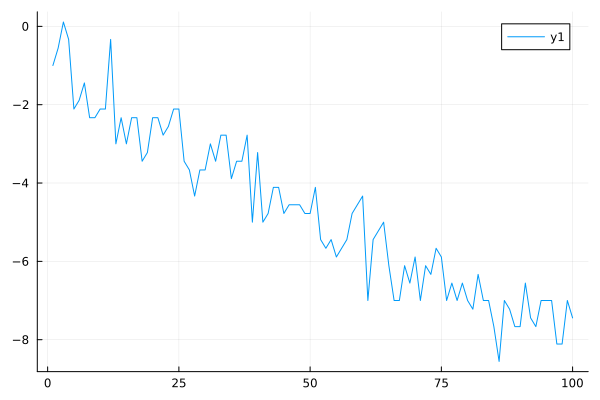

In [13]:
plot(misc["history"][:, 1])